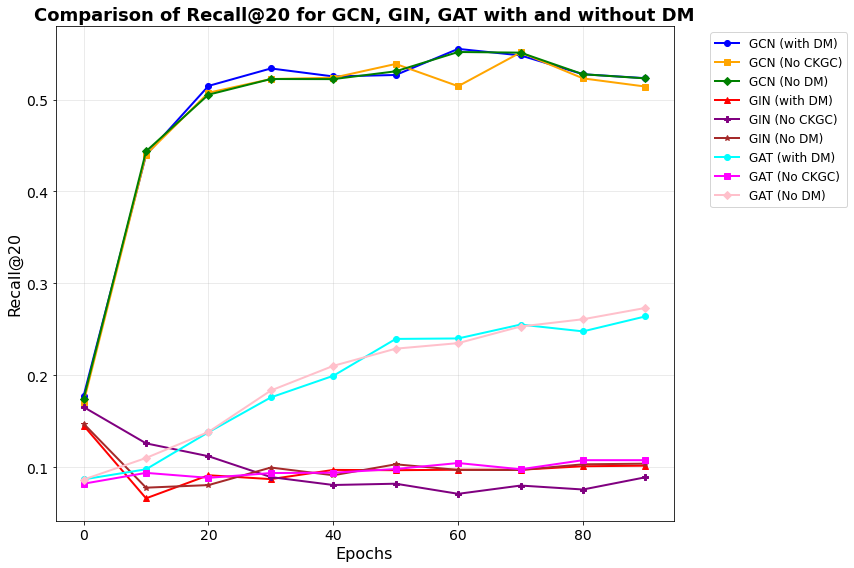

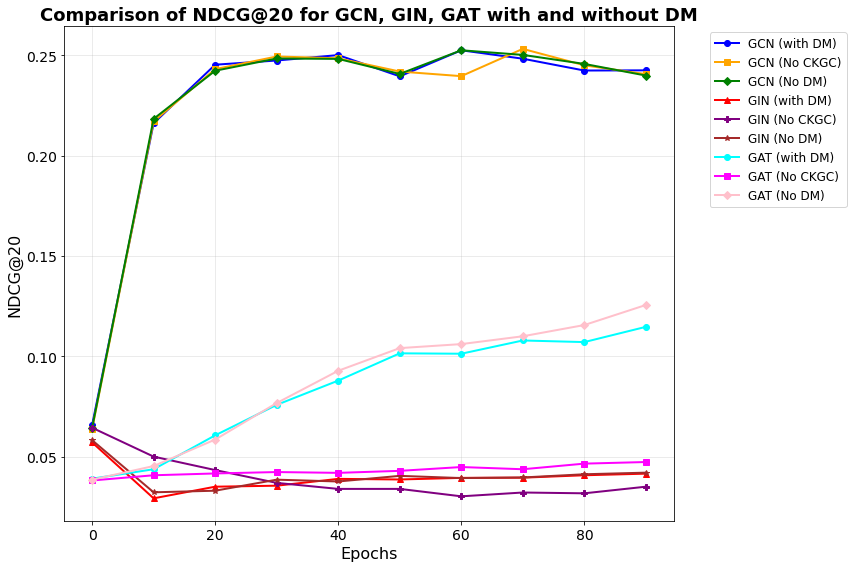

           Model  Recall@20  NDCG@20
0  GCN (with DM)     0.5551   0.2526
1  GCN (No CKGC)     0.5512   0.2533
2    GCN (No DM)     0.5517   0.2526
3  GIN (with DM)     0.1454   0.0571
4  GIN (No CKGC)     0.1655   0.0644
5    GIN (No DM)     0.1474   0.0582
6  GAT (with DM)     0.2641   0.1147
7  GAT (No CKGC)     0.1077   0.0473
8    GAT (No DM)     0.2733   0.1256
Table sorted by Recall@20:
           Model  Recall@20  NDCG@20
0  GCN (with DM)     0.5551   0.2526
2    GCN (No DM)     0.5517   0.2526
1  GCN (No CKGC)     0.5512   0.2533
8    GAT (No DM)     0.2733   0.1256
6  GAT (with DM)     0.2641   0.1147
4  GIN (No CKGC)     0.1655   0.0644
5    GIN (No DM)     0.1474   0.0582
3  GIN (with DM)     0.1454   0.0571
7  GAT (No CKGC)     0.1077   0.0473

Table sorted by NDCG@20:
           Model  Recall@20  NDCG@20
1  GCN (No CKGC)     0.5512   0.2533
0  GCN (with DM)     0.5551   0.2526
2    GCN (No DM)     0.5517   0.2526
8    GAT (No DM)     0.2733   0.1256
6  GAT (with DM)     0

In [6]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# Function to extract metrics from log files
def extract_metrics_from_log(file_path):
    epochs = []
    train_losses = []
    gen_losses = []
    recalls = []
    ndcgs = []
    pattern = r"Epoch (\d+): Train Loss = ([\d.]+), Gen Loss = ([\d.]+), Recall = ([\d.]+), NDCG = ([\d.]+)"

    try:
        with open(file_path, "r") as file:
            for line in file:
                match = re.search(pattern, line)
                if match:
                    epoch = int(match.group(1))
                    train_loss = float(match.group(2))
                    gen_loss = float(match.group(3))
                    recall = float(match.group(4))
                    ndcg = float(match.group(5))

                    epochs.append(epoch)
                    train_losses.append(train_loss)
                    gen_losses.append(gen_loss)
                    recalls.append(recall)
                    ndcgs.append(ndcg)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    return epochs, train_losses, gen_losses, recalls, ndcgs


# Function to plot comparisons with colors and markers
def plot_comparison(metrics, models, title, ylabel, output_file):
    plt.figure(figsize=(12, 8))
    markers = ['o', 's', 'D', '^', 'P', '*']
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'cyan', 'magenta', 'pink', 'grey']

    for idx, (model, (epochs, metric_values)) in enumerate(metrics.items()):
        plt.plot(
            epochs,
            metric_values,
            label=model,
            marker=markers[idx % len(markers)],
            color=colors[idx % len(colors)],
            linestyle='-',
            linewidth=2,
            markersize=6,
        )

    plt.title(title, fontsize=18, fontweight="bold")
    plt.xlabel("Epochs", fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=12, loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()


# Define log files for models
# logs_with_and_without_dm = {
#     "GCN (DM 100 steps)": "results_gcn_100.txt",
#     "GCN (DM 25 steps)": "results_gcn_25.txt",
#     "GCN (No CKGC)": "results_GCN_no_CKGC.txt",
#     "GCN (No DM)": "results_GCN_no_DM.txt",
#     "GCN (With DM)": "results_GCN_with_DM.txt",
#     "GCN (DM 50 steps)": "results_standard_GCN_50.txt",
#     "GCN (Without CKGC)": "results_wo_ckgc.txt",
#     "GIN (DM 50 steps)": "results_GIN.txt",
#     "GIN (DM 100 steps)": "results_GIN_100.txt",
#     "GIN (No CKGC)": "results_GIN_no_CKGC.txt",
#     "GIN (No DM)": "results_GIN_no_DM.txt",
#     "GIN (With DM)": "results_GIN_with_DM.txt",
#     "GIN (Without DM)": "results_ginwodm.txt",
#     "GAT (DM 100 steps)": "results_GAT_100.txt",
#     "GAT (DM 25 steps)": "results_gat_25.txt",
#     "GAT (No CKGC)": "results_GAT_no_CKGC.txt",
#     "GAT (No DM)": "results_GAT_no_DM.txt",
#     "GAT (With DM)": "results_GAT_with_DM.txt",
#     "GAT (Without DM)": "results_gatwodm.txt",
#     "GAT (DM 50 steps)": "resultsGat.txt"
# }
logs_with_and_without_dm = {
    "GCN (with DM)": "results_gcn_100.txt",
    "GCN (No CKGC)": "results_GCN_no_CKGC.txt",
    "GCN (No DM)": "results_GCN_no_DM.txt",
    "GIN (with DM)": "results_GIN_100.txt",
    "GIN (No CKGC)": "results_GIN_no_CKGC.txt",
    "GIN (No DM)": "results_GIN_no_DM.txt",
    "GAT (with DM)": "results_GAT_100.txt",
    "GAT (No CKGC)": "results_GAT_no_CKGC.txt",
    "GAT (No DM)": "results_GAT_no_DM.txt",
}




# Extract metrics
metrics_recall = {}
metrics_ndcg = {}

for model, log_file in logs_with_and_without_dm.items():
    epochs, _, _, recalls, ndcgs = extract_metrics_from_log(log_file)
    if epochs:  # Add to metrics only if data is found
        metrics_recall[model] = (epochs, recalls)
        metrics_ndcg[model] = (epochs, ndcgs)

# Plot Recall@20 and NDCG@20 comparisons
plot_comparison(metrics_recall, logs_with_and_without_dm.keys(),
                "Comparison of Recall@20 for GCN, GIN, GAT with and without DM",
                "Recall@20",
                "recall_comparison.png")

plot_comparison(metrics_ndcg, logs_with_and_without_dm.keys(),
                "Comparison of NDCG@20 for GCN, GIN, GAT with and without DM",
                "NDCG@20",
                "ndcg_comparison.png")


# Generate a table of maximum Recall@20 and NDCG@20 values
def generate_max_values_table(metrics_recall, metrics_ndcg, models):
    max_values = []
    for model in models:
        if model in metrics_recall and model in metrics_ndcg:
            max_recall = max(metrics_recall[model][1])
            max_ndcg = max(metrics_ndcg[model][1])
            max_values.append([model, max_recall, max_ndcg])

    df = pd.DataFrame(max_values, columns=["Model", "Recall@20", "NDCG@20"])
    return df


# Create and display the table
df_max_values = generate_max_values_table(metrics_recall, metrics_ndcg, logs_with_and_without_dm.keys())
print(df_max_values)
# Sort the DataFrame by Recall@20 in descending order
df_sorted_by_recall = df_max_values.sort_values(by="Recall@20", ascending=False)
print("Table sorted by Recall@20:")
print(df_sorted_by_recall)

# Sort the DataFrame by NDCG@20 in descending order
df_sorted_by_ndcg = df_max_values.sort_values(by="NDCG@20", ascending=False)
print("\nTable sorted by NDCG@20:")
print(df_sorted_by_ndcg)
